In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
BASE_DIR = "D:/Fall 2023/6748 Practicum/"

RAW_DATA_LOC = os.path.join(BASE_DIR,"raw_data")
PLOT_OUTPUTS_LOC = os.path.join(BASE_DIR,"outputs")

def add_make_miss(df):
    df["made"] = np.where(df["Stat"].str.contains("Make"),1,0)
    return df
def add_shot_type_major(df):
    df["shot_type_major"] = np.where(df["Stat"].str.contains("Three"),"three_ptr","two_ptr")
    return df
def add_score_diff(df):
    df["score_1"] = df.Score.apply(lambda x: x.strip(" ").split("-")[0]).astype("int")
    df["score_2"] = df.Score.apply(lambda x: x.strip(" ").split("-")[1]).astype("int")
    df["score_diff"] = df.score_1 - df.score_2
    return df


In [7]:
shots_data = pd.read_csv(os.path.join(RAW_DATA_LOC, "NCAAM1 22-23 shotsdf.csv"))
shots_data = add_make_miss(shots_data)
shots_data = add_score_diff(shots_data)
shots_data = add_shot_type_major(shots_data)

print(shots_data.columns)
pd.options.display.max_columns = None
print(shots_data.head())
for col in shots_data.columns:
    if len(shots_data[col].unique())<20:
        print(f"Uniques of column {col} : {shots_data[col].unique()}")


cols_hist = ["Time_Seconds","x_coordinate","y_coordinate","Angle","Distance","score_1","score_2","score_diff"]
df2 = shots_data


Index(['game_id', 'Team', 'player', 'shot_id', 'score', 'score_opp', 'Period',
       'segment', 'Time', 'Time_Seconds', 'Stat', 'Zone', 'x_coordinate',
       'y_coordinate', 'Angle', 'Distance', 'Score', 'Jumpshot', 'Assisted',
       'Red Zone', 'Floater', 'Second Chance', 'Layup', 'Paint', 'Drive',
       'Blocked', 'ATO', 'Off Turnover', 'Off Steal', 'Hook Shot', 'Fastbreak',
       'Pullup', 'And1', 'Turnaround', 'Dunk', 'Step Back', 'made', 'score_1',
       'score_2', 'score_diff', 'shot_type_major'],
      dtype='object')
                    game_id                      Team  \
0  636a5fc5531336e79c342993  5e875e684dc25ebee5af6797   
1  636a5fc5531336e79c342993  5e875e684dc25ebee5af6797   
2  636a5fc5531336e79c342993  5e875e684dc25ebee5af6797   
3  636a5fc5531336e79c342993  5e875e684dc25ebee5af6797   
4  636a5fc5531336e79c342993  5e875e684dc25ebee5af6797   

                     player                   shot_id  score  score_opp  \
0  618d6f44ed05764db467fe48  636a5fa6531336e7

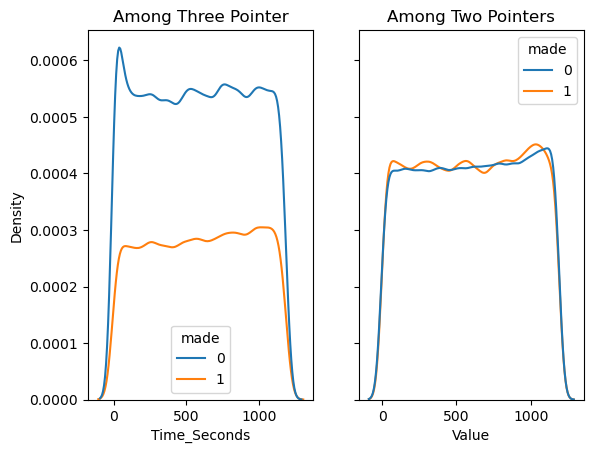

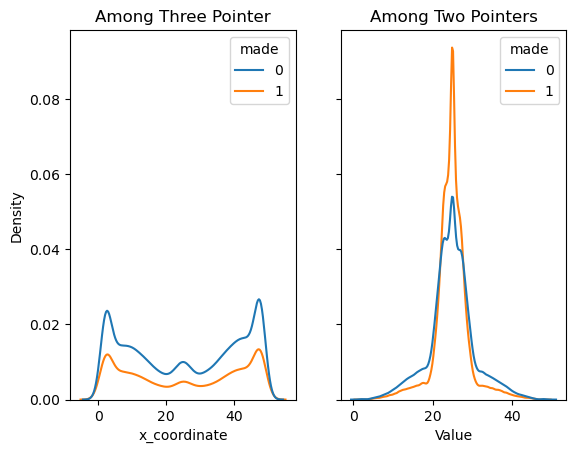

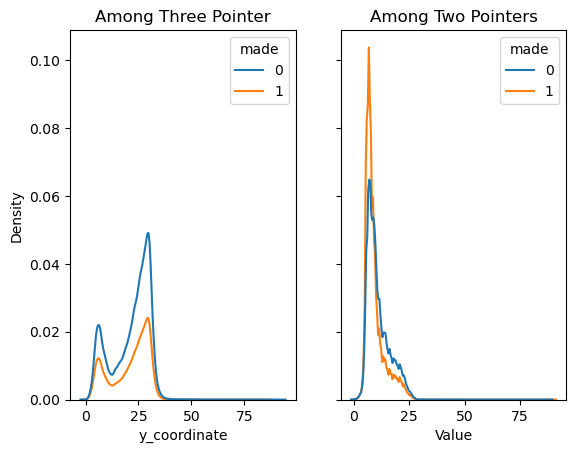

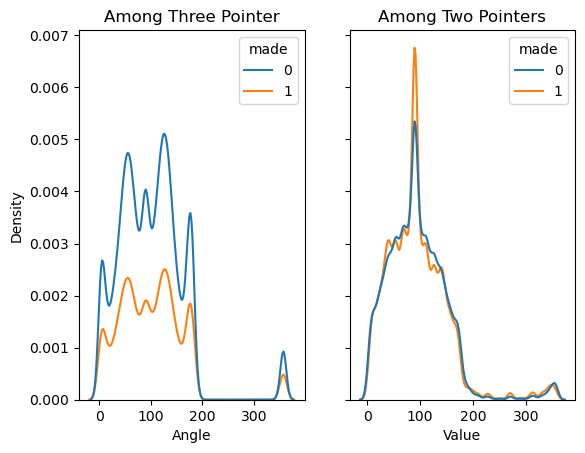

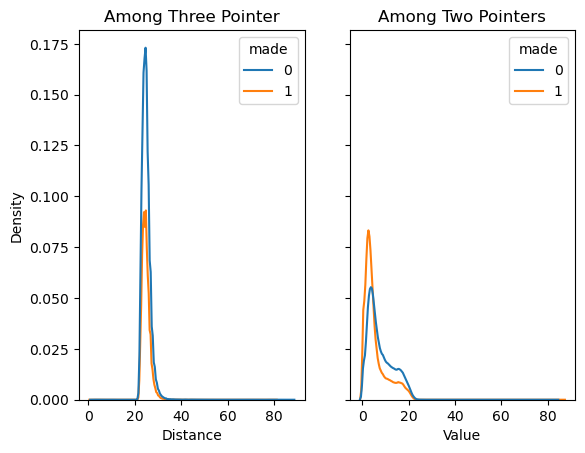

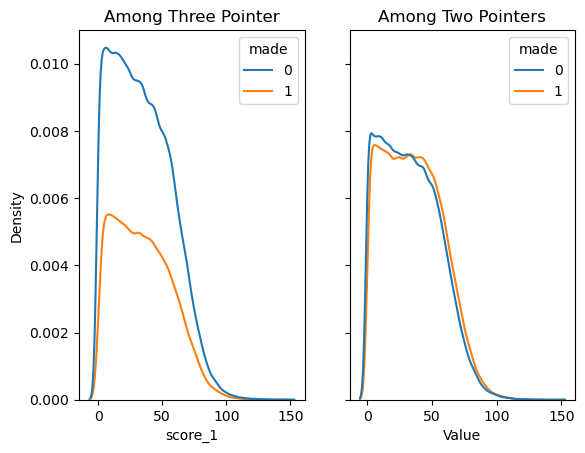

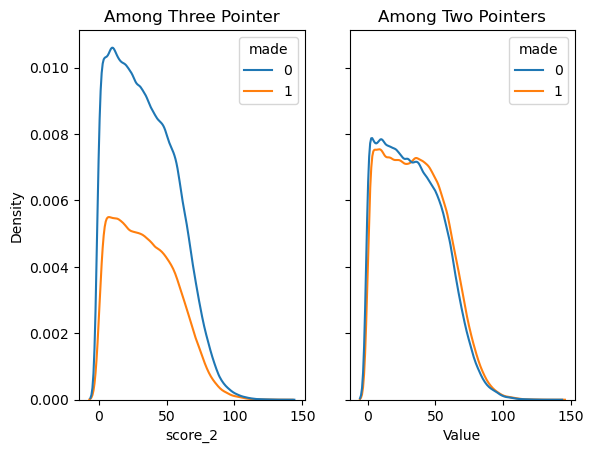

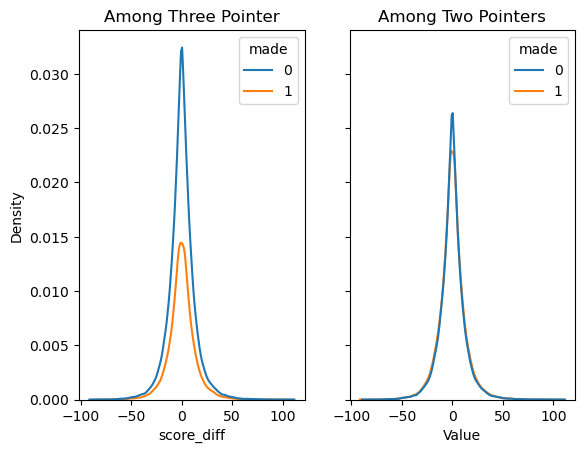

In [8]:
for column in cols_hist:
    fig, axs = plt.subplots(ncols=2,sharey=True)
    sns.kdeplot(data=df2.loc[df2.shot_type_major == "three_ptr"], x=column, hue = "made",ax=axs[0],legend=True)
    sns.kdeplot(data=df2.loc[df2.shot_type_major == "two_ptr"], x=column, hue = "made",ax=axs[1],legend=True)
    axs[0].set_title("Among Three Pointer")
    axs[1].set_title("Among Two Pointers")
    plt.xlabel('Value')
    plt.ylabel('Number of X')
    plt.show()